## Buy Box Datenanalyse

In [15]:
import pandas as pd
import numpy as np

df = pd.read_csv('../Grunddatein/Zwischendatein/CleanedDataComplete.csv')

C:\Users\Robert Betschinger\AppData\Local\Temp\ipykernel_13156\3459770669.py:4: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Grunddatein/Zwischendatein/CleanedDataComplete.csv')


In [16]:
df.head()

,id,asin,price,currency,time,crawlTime,condition,sellerName,sellerId,sellerbewertung,seller_sterne,lieferdatum,lieferpreis,lieferung_durch,ranking,buyBoxWinner,numberOfSellers,trigByReactive,Fulfillment_type,date_diff
0,341698.0,B001R4BR1O,52.43,€,2023-03-22 16:00:00,2023-03-22 16:54:19.532185,New,amazon,amazon,4211.00,5.0,Saturday. March 25,0.0,Amazon,0.0,True,11.0,f,FBA,2.0
1,341712.0,B0062VH4NM,40.84,€,2023-03-22 16:00:00,2023-03-22 16:54:19.541368,New,WSK-Internetservice,A3ORTHHJUBAXI7,404.74,5.0,Saturday. March 25,0.0,Amazon,0.0,True,3.0,f,FBA,7.0
2,341803.0,B07T9MTJHM,57.12,€,2023-03-22 16:00:00,2023-03-22 16:54:19.592193,New,BOSSPRODUCTS,A1FKQ4E0L7V4I,704.00,5.0,Saturday. March 25,0.0,Amazon,0.0,True,3.0,f,FBA,4.0
3,341833.0,B00SWI2UK0,70.71,€,2023-03-22 16:00:00,2023-03-22 16:54:19.610406,New,PRIVIX® (Preise inkl. MwSt.),A26GYXB1OSGPR3,1413.12,5.0,Saturday. March 25,0.0,Amazon,0.0,True,40.0,f,FBA,2.0
4,341851.0,B01LXFCIGP,153.94,€,2023-03-22 16:00:00,2023-03-22 16:54:19.620842,New,amazon,amazon,NaN,NaN,Saturday. March 25,0.0,Amazon,0.0,True,18.0,f,FBA,2.0


In [17]:
df.rename(columns={
    'lieferpreis': 'delivery_price',
    'seller_sterne': 'seller_stars',
    'sellerbewertung': 'seller_rating',
    'date_diff': 'delivery_time',
    'numberOfSellers': 'number_of_competing_offers'
}, inplace=True)

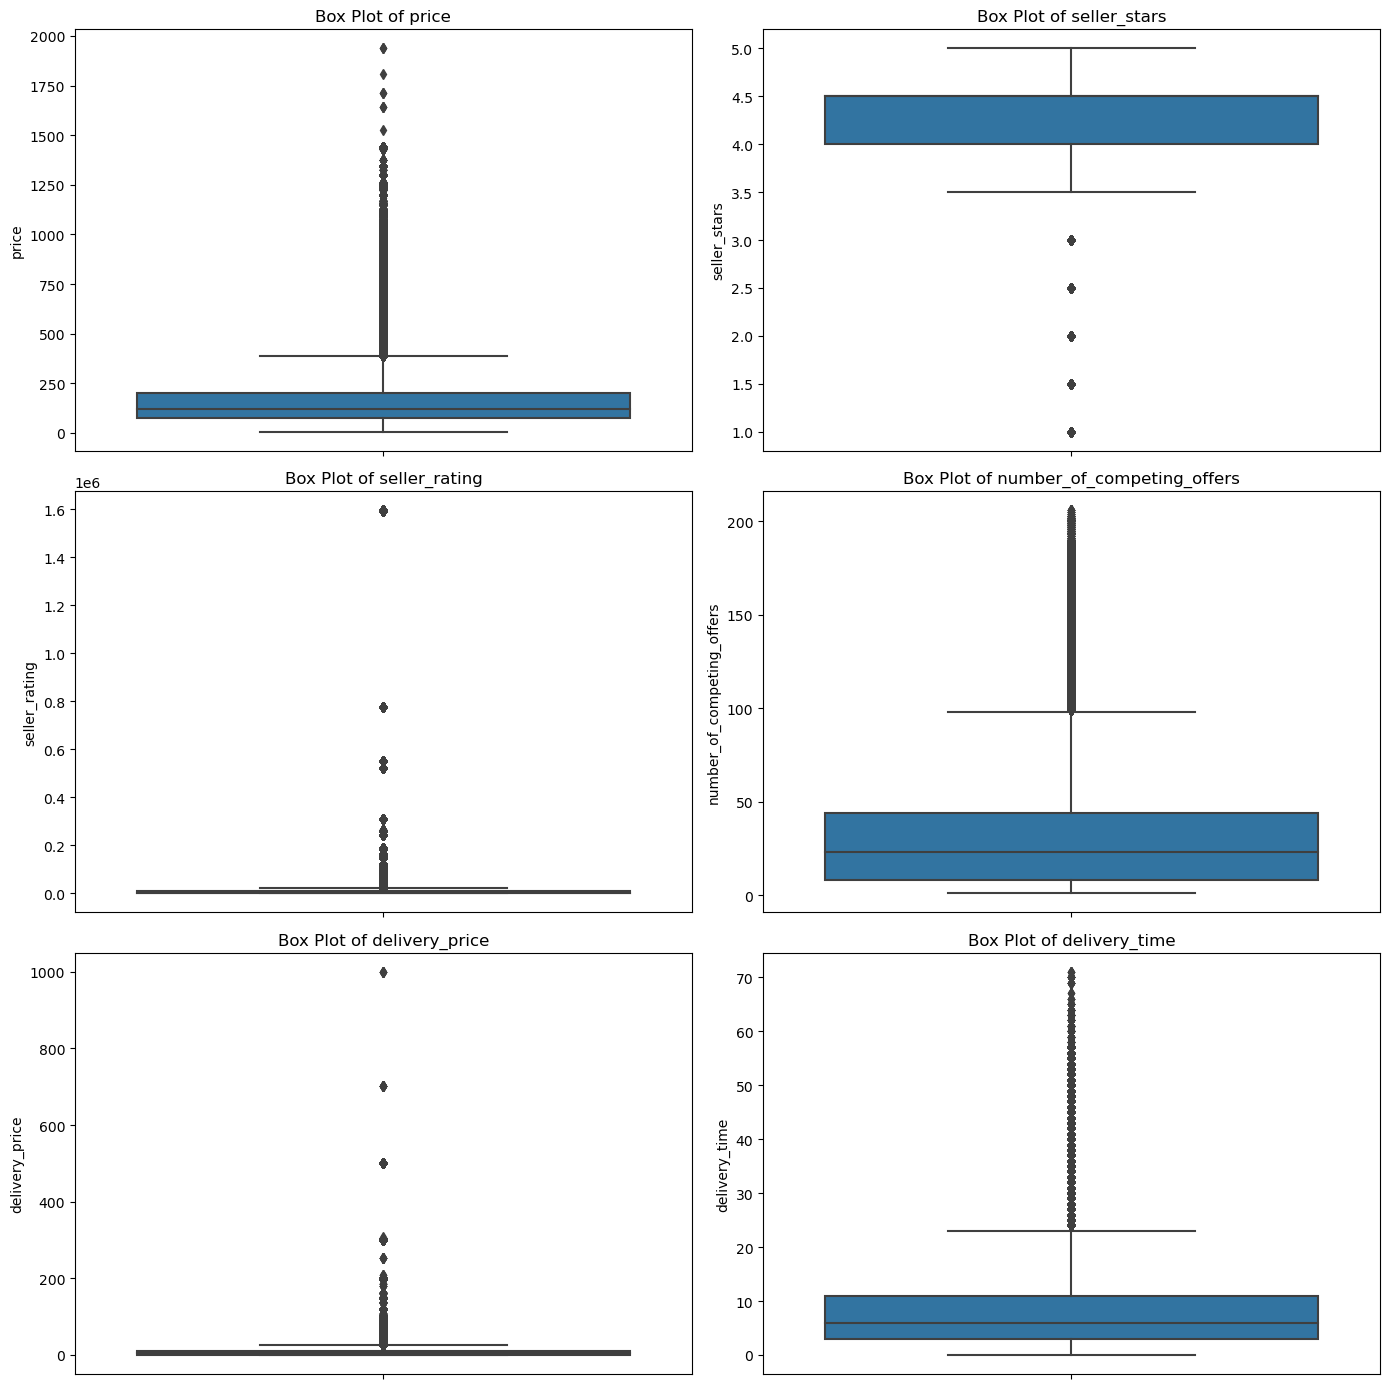

In [37]:
boxplot_columns = ['price', 'seller_stars', 'seller_rating', 'number_of_competing_offers','delivery_price','delivery_time']
import seaborn as sns

def plot_boxplots_2_columns(df, columns, save_path, figsize=(14, 14)):
    nrows = (len(columns) + 1) // 2
    fig, axs = plt.subplots(nrows=nrows, ncols=2, figsize=figsize)
    
    for ax, column in zip(axs.flatten(), columns):
        sns.boxplot(data=df, y=column, ax=ax)
        ax.set_title(f'Box Plot of {column}')
    
    # Remove any unused subplots
    for i in range(len(columns), nrows * 2):
        fig.delaxes(axs.flatten()[i])

    plt.tight_layout()
    plt.savefig(save_path, dpi=300)
    plt.show()

# Call the plot_boxplots_2_columns function with the specified columns
plot_boxplots_2_columns(df, boxplot_columns, save_path='boxplots_2_columns.png')

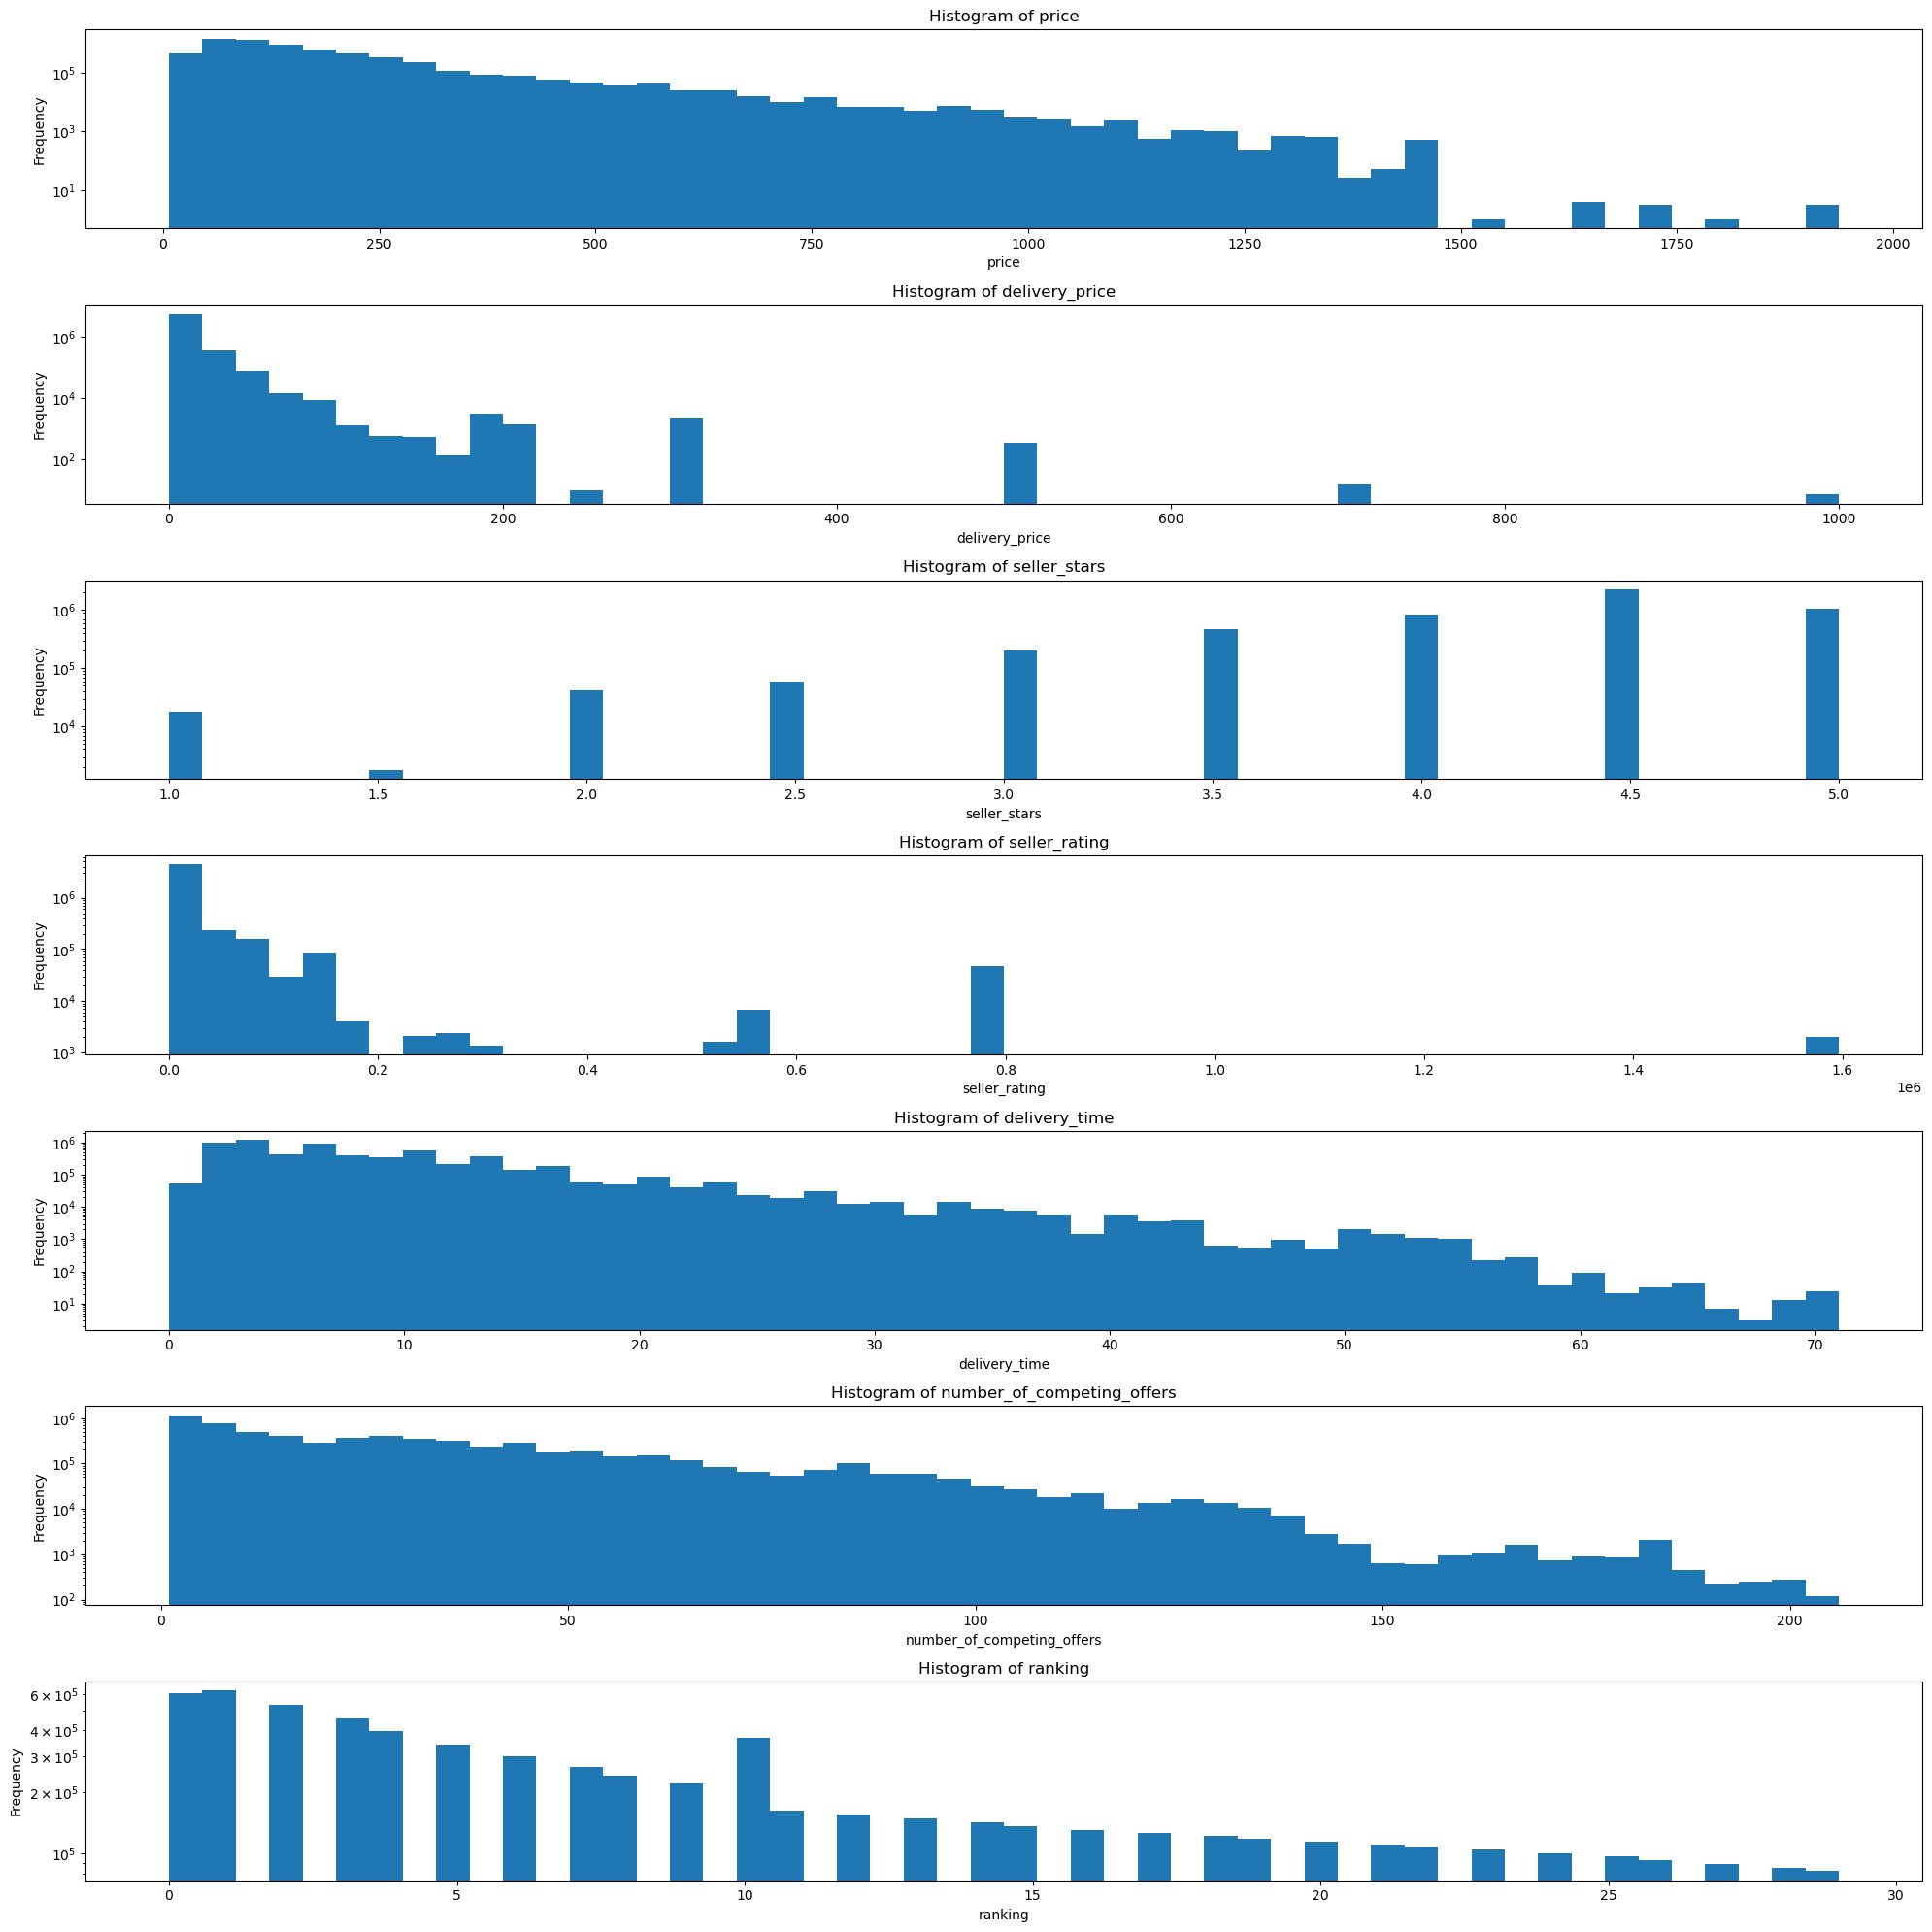

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_histograms(df, columns, bins=10, figsize=(20, 20), log_scale=False, save_path='histograms.png'):
    fig, axs = plt.subplots(nrows=len(columns), figsize=figsize)
    for ax, column in zip(axs, columns):
        if log_scale:
            df[column].plot(ax=ax, kind='hist', bins=bins, log=True)
        else:
            df[column].plot(ax=ax, kind='hist', bins=bins)
        ax.set_title(f'Histogram of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
    plt.tight_layout()
    plt.savefig(save_path, dpi=300)  # Save the plot as an image file
    plt.show()

# List the columns you want to plot histograms for
columns = ['price', 'delivery_price', 'seller_stars', 'seller_rating', 'delivery_time', 'number_of_competing_offers', 'ranking']

# Call the function with the desired columns and specify the file name for the image output
plot_histograms(df, columns, bins=50, log_scale=True, save_path='histogramsAsuwahl.png')


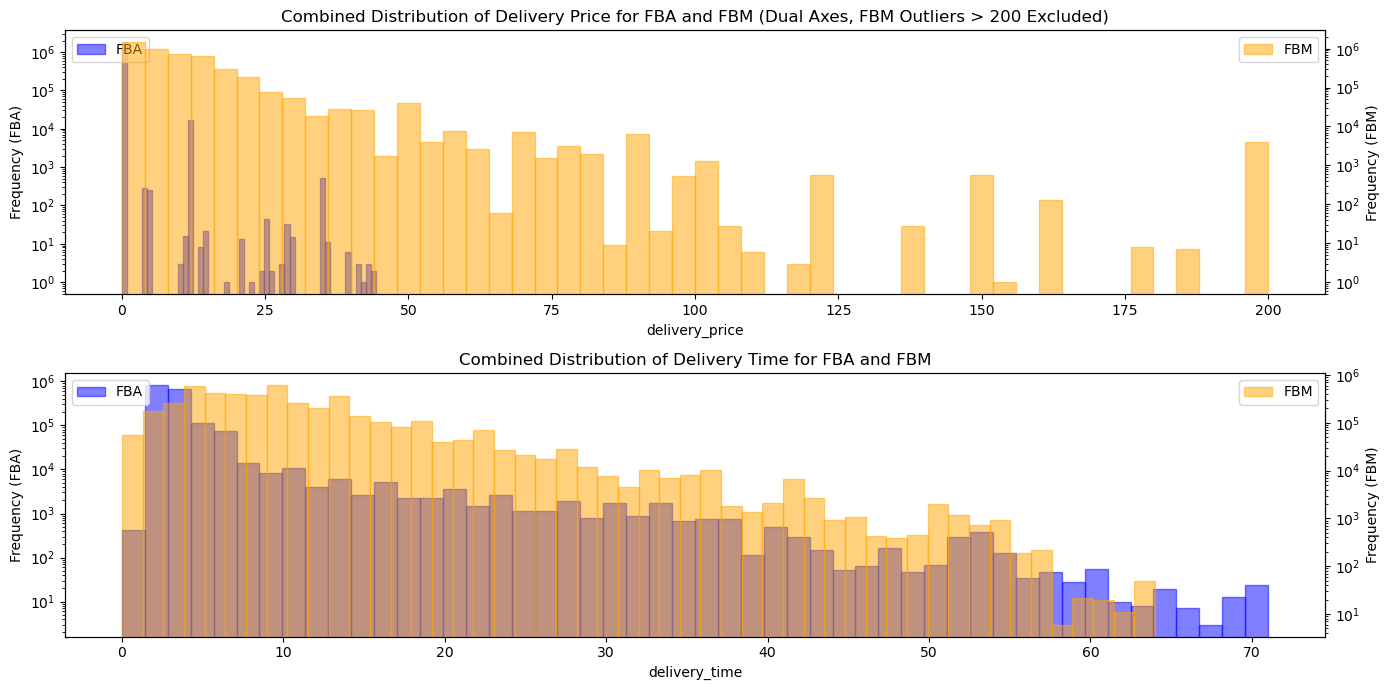

In [19]:
def plot_combined_histograms_dual_axes(df, columns, bins=50, figsize=(14, 7), save_path='combined_histograms_dual_axes.png', filter_condition=None, custom_titles=None, custom_colors=None):
    if filter_condition is not None:
        df = df[filter_condition]

    nrows = len(columns)

    fig, axs = plt.subplots(nrows=nrows, figsize=figsize)

    for ax, column in zip(axs, columns):
        ax2 = ax.twinx()
        fulfillment_types = list(custom_colors.keys())
        for i, (fulfillment_type, color) in enumerate(custom_colors.items()):
            filtered_df = df[df['Fulfillment_type'] == fulfillment_type]
            if fulfillment_type == 'FBM' and column == 'delivery_price':
                filtered_df = filtered_df[filtered_df['delivery_price'] <= 200]
            if i == 0:
                filtered_df[column].plot(ax=ax, kind='hist', bins=bins, log=True, alpha=0.5, color=color, edgecolor=color, label=f'{fulfillment_type}')
            else:
                filtered_df[column].plot(ax=ax2, kind='hist', bins=bins, log=True, alpha=0.5, color=color, edgecolor=color, label=f'{fulfillment_type}')

        if custom_titles is not None:
            title = custom_titles.get(column)
        else:
            title = f'Combined Histogram of {column}'

        ax.set_title(title)
        ax.set_xlabel(column)
        ax.set_ylabel(f'Frequency ({fulfillment_types[0]})')
        ax2.set_ylabel(f'Frequency ({fulfillment_types[1]})')
        ax.legend(loc='upper left')
        ax2.legend(loc='upper right')
    plt.tight_layout()
    plt.savefig(save_path, dpi=300)  # Save the plot as an image file
    plt.show()

custom_titles_combined_dual_axes = {
    'delivery_price': 'Combined Distribution of Delivery Price for FBA and FBM (Dual Axes, FBM Outliers > 200 Excluded)',
    'delivery_time': 'Combined Distribution of Delivery Time for FBA and FBM'
}
custom_colors = {'FBA': 'blue', 'FBM': 'orange'}

plot_combined_histograms_dual_axes(df, columns=['delivery_price', 'delivery_time'], bins=50, save_path='combined_delivery_price_date_diff_histogram_dual_axes.png', custom_titles=custom_titles_combined_dual_axes, custom_colors=custom_colors)


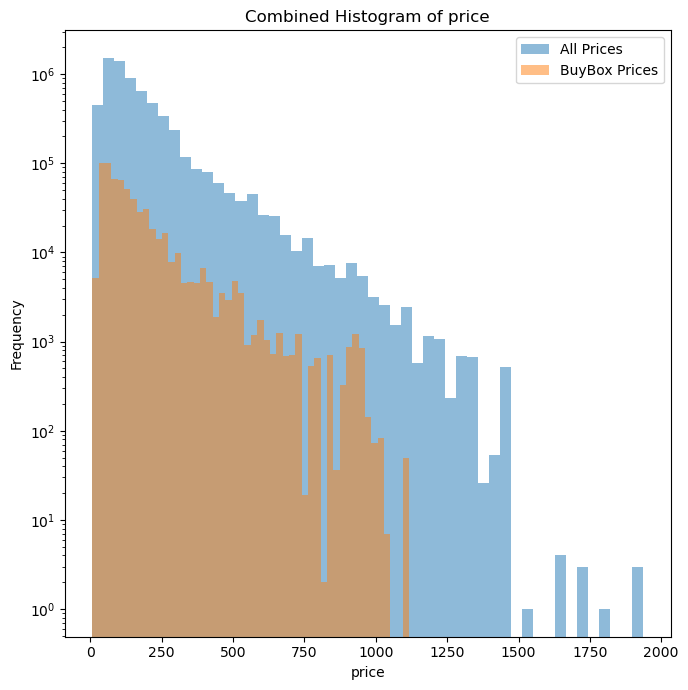

In [20]:
def plot_combined_histogram(df1, df2, column, bins=50, figsize=(7, 7), log_scale=False, save_path='combined_histogram.png'):
    fig, ax = plt.subplots(figsize=figsize)
    
    if log_scale:
        df1[column].plot(ax=ax, kind='hist', bins=bins, log=True, alpha=0.5, label='All Prices')
        df2[column].plot(ax=ax, kind='hist', bins=bins, log=True, alpha=0.5, label='BuyBox Prices')
    else:
        df1[column].plot(ax=ax, kind='hist', bins=bins, alpha=0.5, label='All Prices')
        df2[column].plot(ax=ax, kind='hist', bins=bins, alpha=0.5, label='BuyBox Prices')
    
    ax.set_title(f'Combined Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.legend()
    plt.tight_layout()
    plt.savefig(save_path, dpi=300)  # Save the plot as an image file
    plt.show()

# Call the combined histogram function with the normal price distribution and buyBox price distribution
all_prices_df = df
buybox_prices_df = df[df['buyBoxWinner'] == True]

plot_combined_histogram(all_prices_df, buybox_prices_df, column='price', bins=50, log_scale=True, save_path='combined_histogram.png')



In [18]:
print("Length of the DataFrame:", df.shape[0])
num_true = (df['buyBoxWinner'] == True).sum()
print(f"The Number of Offers winning the BuyBox is {num_true}")

Length of the DataFrame: 6591111
The Number of Offers winning the BuyBox is 610468


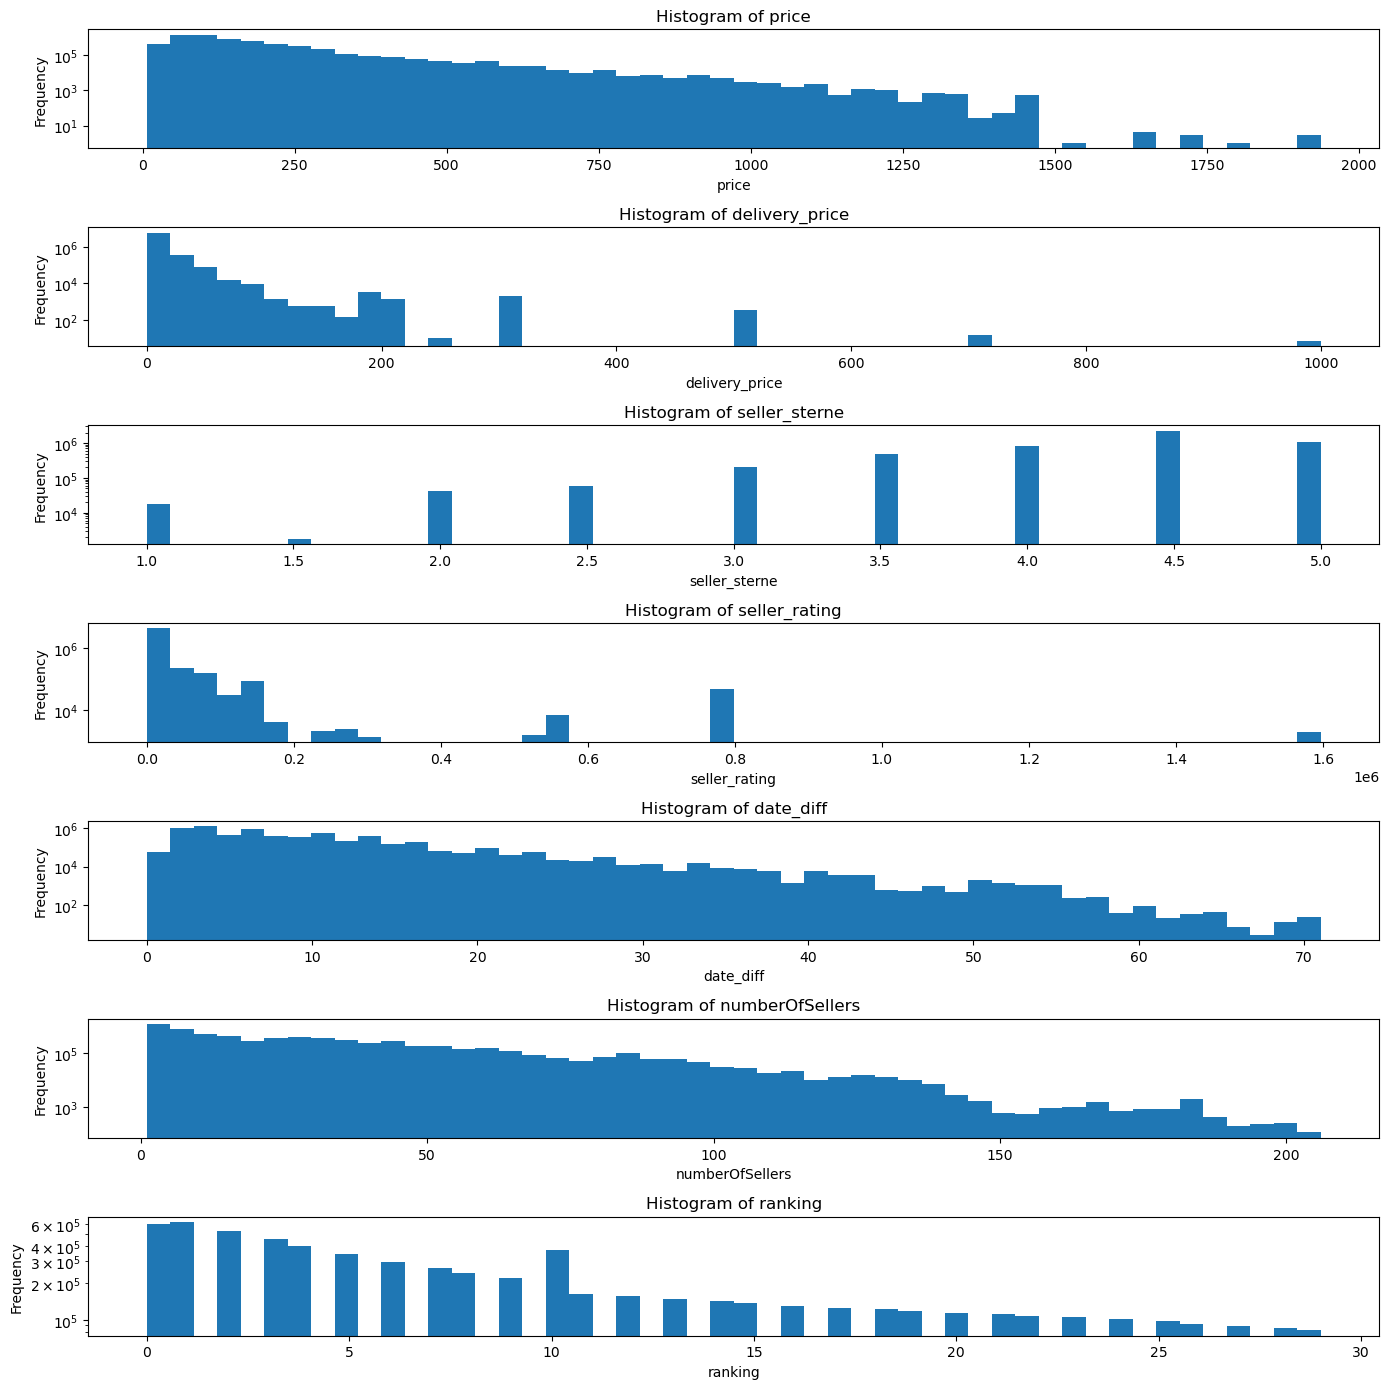

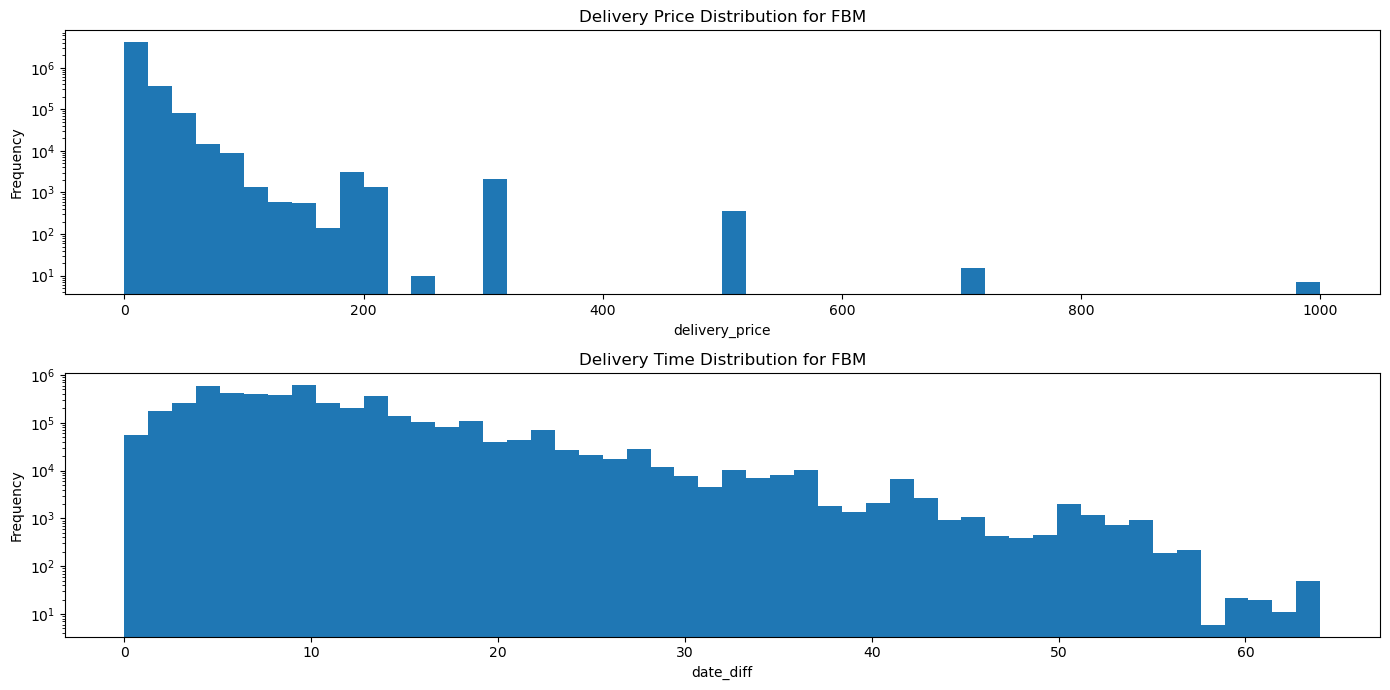

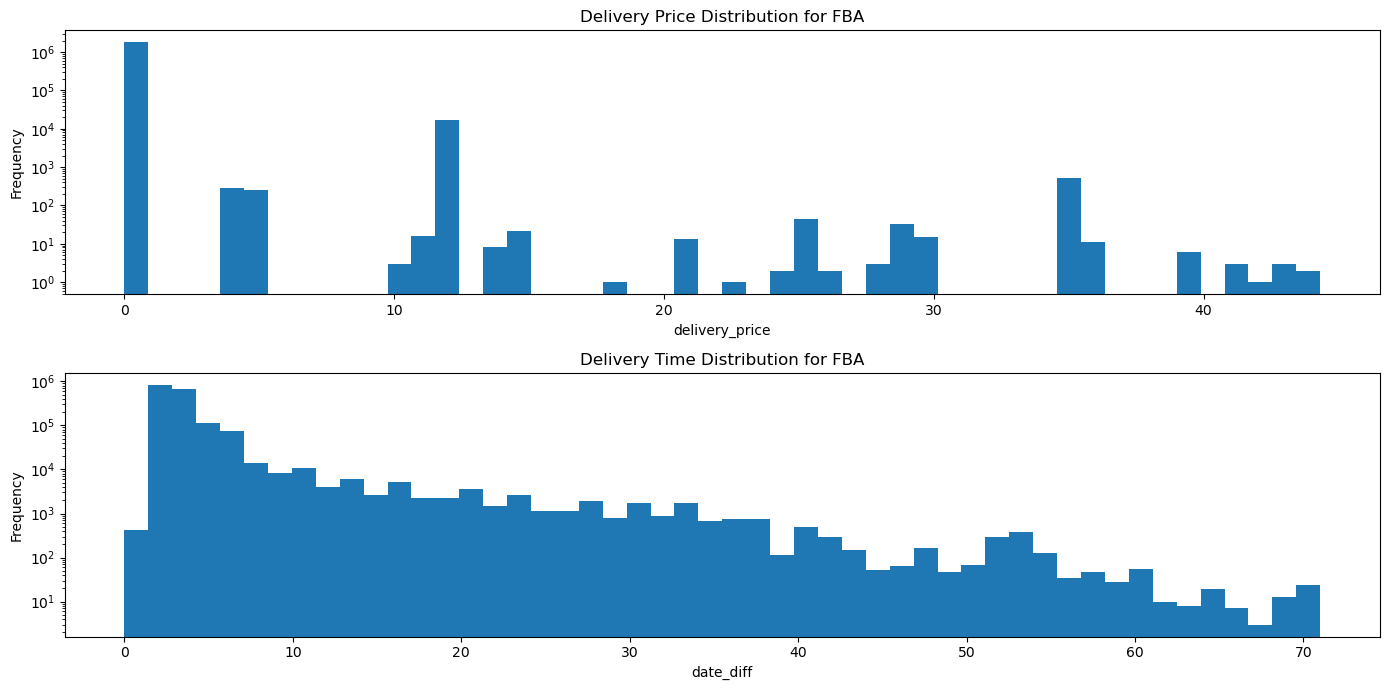

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_histograms(df, columns, bins=10, figsize=(14, 14), log_scale=False, save_path='histograms.png', filter_condition=None, custom_titles=None):
    if filter_condition is not None:
        df = df[filter_condition]
    
    nrows = len(columns)
    
    if nrows == 1:
        fig, axs = plt.subplots(figsize=figsize)
        axs = [axs]
    else:
        fig, axs = plt.subplots(nrows=nrows, figsize=figsize)

    for ax, column in zip(axs, columns):
        if log_scale:
            df[column].plot(ax=ax, kind='hist', bins=bins, log=True)
        else:
            df[column].plot(ax=ax, kind='hist', bins=bins)
        
        if custom_titles is not None:
            title = custom_titles.get(column)
        else:
            title = f'Histogram of {column}'
        
        ax.set_title(title)
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
    plt.tight_layout()
    plt.savefig(save_path, dpi=300)  # Save the plot as an image file
    plt.show()

# Rename the columns
df = df.rename(columns={'sellerbewertung': 'seller_rating', 'lieferpreis': 'delivery_price'})

# List the columns you want to plot histograms for
columns = ['price', 'delivery_price', 'seller_sterne', 'seller_rating', 'date_diff', 'numberOfSellers', 'ranking']

# Call the function with the desired columns and specify the file name for the image output
plot_histograms(df, columns, bins=50, log_scale=True, save_path='histograms.png')

# Additional histograms

# Histogram for delivery price and date_diff for rows where the Fulfillment_type is FBM and FBA
custom_titles_fbm = {
    'delivery_price': 'Delivery Price Distribution for FBM',
    'date_diff': 'Delivery Time Distribution for FBM'
}
custom_titles_fba = {
    'delivery_price': 'Delivery Price Distribution for FBA',
    'date_diff': 'Delivery Time Distribution for FBA'
}
plot_histograms(df, columns=['delivery_price', 'date_diff'], bins=50, log_scale=True, save_path='fbm_delivery_price_date_diff_histogram.png', filter_condition=df['Fulfillment_type'] == 'FBM', figsize=(14, 7), custom_titles=custom_titles_fbm)
plot_histograms(df, columns=['delivery_price', 'date_diff'], bins=50, log_scale=True, save_path='fba_delivery_price_date_diff_histogram.png', filter_condition=df['Fulfillment_type'] == 'FBA', figsize=(14, 7), custom_titles=custom_titles_fba)


In [12]:
buy_box_counts = df['buyBoxWinner'].value_counts()
buy_box_counts

False    5981045
True      610066
Name: buyBoxWinner, dtype: int64

In [55]:
# Group the DataFrame by 'asin' and calculate the mean of the 'numberOfSellers' column
mean_sellers_by_asin = df.groupby('asin')['numberOfSellers'].mean().reset_index()

# Save the resulting DataFrame to a CSV file
mean_sellers_by_asin.to_csv('../Grunddatein/Zwischendatein/Asins_with_mean_competitors.csv', index=False)

# Round the 'numberOfSellers' mean values to full integers
mean_sellers_by_asin['numberOfSellers'] = mean_sellers_by_asin['numberOfSellers'].round().astype(int)

# Count the occurrences of each number in the 'numberOfSellers' column
occurrences = mean_sellers_by_asin['numberOfSellers'].value_counts()

# Print the occurrences
len(occurrences)


94

## Generating Lists Of Asins Where Amazon is Present as a Seller and where Not

In [36]:
# Count the number of rows where the 'sellerName' is 'amazon'
amazon_offers_count = len(df[df['sellerName'] == 'amazon'])

print(f"Anzahl der Angebote, die von Amazon verkauft werden: {amazon_offers_count}")

# Count the number of rows where the 'sellerName' is not 'amazon'
non_amazon_offers_count = len(df[df['sellerName'] != 'amazon'])

print(f"Anzahl der Angebote, die nicht von Amazon verkauft werden: {non_amazon_offers_count}")
print(f"Insgesamt gibt es {len(df)} Angebote.")


Anzahl der Angebote, die von Amazon verkauft werden: 405036
Anzahl der Angebote, die nicht von Amazon verkauft werden: 6186075
Insgesamt gibt es 6591111 Angebote.


In [42]:
# Define the Amazon variations
amazon_variations = ['amazon', 'Amazon Warehouse ', 'Amazon US', 'Amazon UK','Amazon']

# Count the number of rows where the 'sellerName' is in the list of Amazon variations
amazon_offers_count = len(df[df['sellerName'].isin(amazon_variations)])

print(f"Anzahl der Angebote, die von Amazon oder einer Amazon-Variante verkauft werden: {amazon_offers_count}")

# Count the number of rows where the 'sellerName' is not in the list of Amazon variations
non_amazon_offers_count = len(df[~df['sellerName'].isin(amazon_variations)])

print(f"Anzahl der Angebote, die nicht von Amazon oder einer Amazon-Variante verkauft werden: {non_amazon_offers_count}")
print(f"Insgesamt gibt es {len(df)} Angebote.")


Anzahl der Angebote, die von Amazon oder einer Amazon-Variante verkauft werden: 1585854
Anzahl der Angebote, die nicht von Amazon oder einer Amazon-Variante verkauft werden: 5005257
Insgesamt gibt es 6591111 Angebote.


In [38]:
amazon_asin_values = df.loc[df['sellerName'].isin(['amazon']), 'asin'].unique()
print(f"An so vielen Asins ist Amazon als Verkäufer eingetragen:{len(amazon_asin_values)}")

# Assuming the DataFrame is named 'df'
all_asin_values = df['asin'].unique()

# Subtract the values that exist in the 'amazon_asin_values' list
non_amazon_asin_values = set(all_asin_values) - set(amazon_asin_values)
print(f"An so vielen Asins ist Amazon nicht als Verkäufer eingetragen:{len(non_amazon_asin_values)}")
print(f"So Viele unterschiedliche Asins gibt es maximal {len(all_asin_values)}")

An so vielen Asins ist Amazon als Verkäufer eingetragen:672
An so vielen Asins ist Amazon nicht als Verkäufer eingetragen:322
So Viele unterschiedliche Asins gibt es maximal 994


In [39]:
amazon_asin_values = df.loc[df['sellerName'].isin(['amazon', 'Amazon Warehouse ', 'Amazon US', 'Amazon UK','Amazon']), 'asin'].unique()
print(f"An so vielen Asins ist Amazon als Verkäufer eingetragen:{len(amazon_asin_values)}")

# Assuming the DataFrame is named 'df'
all_asin_values = df['asin'].unique()

# Subtract the values that exist in the 'amazon_asin_values' list
non_amazon_asin_values = set(all_asin_values) - set(amazon_asin_values)
print(f"An so vielen Asins ist Amazon nicht als Verkäufer eingetragen:{len(non_amazon_asin_values)}")
print(f"So Viele unterschiedliche Asins gibt es maximal {len(all_asin_values)}")

An so vielen Asins ist Amazon als Verkäufer eingetragen:747
An so vielen Asins ist Amazon nicht als Verkäufer eingetragen:247
So Viele unterschiedliche Asins gibt es maximal 994


In [45]:
# Define the Amazon variations
amazon_variations = ['amazon', 'Amazon Warehouse', 'Amazon US', 'Amazon UK','Amazon']

# Filter the DataFrame to get rows with non-Amazon sellers
non_amazon_sellers_df = df[~df['sellerName'].isin(amazon_variations)]

# Get the unique ASINs from the filtered DataFrame
non_amazon_seller_asin_values = non_amazon_sellers_df['asin'].unique()

print(f"Anzahl der verschiedenen ASINs, die von Verkäufern verkauft werden, die keine Amazon-Variante sind: {len(non_amazon_seller_asin_values)}")


Anzahl der verschiedenen ASINs, die von Verkäufern verkauft werden, die keine Amazon-Variante sind: 988


In [47]:
# List of Amazon variations
amazon_variations = ['amazon', 'Amazon Warehouse', 'Amazon US', 'Amazon UK','Amazon']

# Filter rows where the sellerName is in the Amazon variations list
amazon_sellers_df = df[df['sellerName'].isin(amazon_variations)]

# Group by ASIN and count the number of unique sellers for each ASIN
unique_seller_counts = df.groupby('asin')['sellerName'].nunique().reset_index()

# Filter the unique seller counts to only include ASINs with a single unique seller
single_seller_asins = unique_seller_counts[unique_seller_counts['sellerName'] == 1]

# Get the list of ASINs exclusively sold by Amazon variations
amazon_only_asins = single_seller_asins[single_seller_asins['asin'].isin(amazon_sellers_df['asin'].unique())]['asin']

# Print the number of ASINs exclusively sold by Amazon and its variations
print(f"Number of ASINs exclusively sold by Amazon and its variations: {len(amazon_only_asins)}")


Number of ASINs exclusively sold by Amazon and its variations: 6


## Vergleich wie Oft die Seller die BuyBox gewinnen wenn Amazon nicht dabei ist.

In [26]:
## Vergleich wie Oft die Seller die BuyBox gewinnen wenn Amazon dabei ist, nicht dabei ist.
##Wie oft Seller unter Sich gewinnen
# Get the rows where the asin is in 'non_amazon_asin_values' and the 'buyBoxWinner' column is True
df_non_amazon_buy_box_winners = df.loc[(df['asin'].isin(non_amazon_asin_values)) & (df['buyBoxWinner'] == True )]
amazon_seller_names = ['amazon', 'Amazon Warehouse', 'Amazon US', 'Amazon UK']

# Get the total count of rows where the asin is in 'non_amazon_asin_values' and the 'buyBoxWinner' column is True
total_count = len(df_non_amazon_buy_box_winners)

# Get the count of rows where the value in the 'sellerName' column is not in the 'amazon_seller_names' list
seller_count = len(df_non_amazon_buy_box_winners.loc[~df_non_amazon_buy_box_winners['sellerName'].isin(amazon_seller_names)])

# Calculate the percentage
if total_count > 0:
    percentage = (seller_count / total_count) * 100
else:
    percentage = 0

# Print the percentage
print(percentage)


100.0


## Wie oft FremdSeller die BuyBox gewinnen wenn Amazon dabei ist

In [155]:
#Wie oft Seller mit Amazon gewinnen
# Get the rows where the asin is in 'amazon_asin_values' and the 'buyBoxWinner' column is True
df_amazon_buy_box_winners = df.loc[(df['asin'].isin(amazon_asin_values)) & (df['buyBoxWinner'] == True)]

# Get the total count of rows where the asin is in 'amazon_asin_values' and the 'buyBoxWinner' column is True
total_count = len(df_amazon_buy_box_winners)
print(f"The Number of BuyBoxWinning Rows for products where Amazon as a seller is present {total_count}")

# Get the count of rows where the value in the 'sellerName' column is not 'amazon' or 'Amazon Warehouse'
offer_without_amazon = df_amazon_buy_box_winners.loc[(df_amazon_buy_box_winners['sellerName'] != 'amazon') & (df_amazon_buy_box_winners['sellerName'] != 'Amazon Warehouse')]
#print(offer_without_amazon)
seller_count = len(offer_without_amazon)
print(f"The Number of BuyBoxWinning Rows where Amazon is not the winner is {seller_count}")

offer_without_amazon = df_amazon_buy_box_winners.loc[(df_amazon_buy_box_winners['sellerName'] == 'amazon') | (df_amazon_buy_box_winners['sellerName'] == 'Amazon Warehouse')]
print(f"The Number of BuyBoxWinning Rows where Amazon is the winner is {len(offer_without_amazon)}")
# Calculate the percentage
if total_count > 0:
    percentage = (seller_count / total_count) * 100
else:
    percentage = 0

# Print the percentage
print(percentage)


The Number of BuyBoxWinning Rows for products where Amazon as a seller is present 472534
The Number of BuyBoxWinning Rows where Amazon is not the winner is 122254
The Number of BuyBoxWinning Rows where Amazon is the winner is 350280
25.872000744919944


## Wie oft ist der niedrigste Preis auch der Gewinner?

In [156]:
df.tail()

,id,asin,price,currency,time,crawlTime,condition,sellerName,sellerId,sellerbewertung,seller_sterne,lieferdatum,lieferpreis,lieferung_durch,ranking,buyBoxWinner,numberOfSellers,trigByReactive,Fulfillment_type,date_diff
6591106,6944946.0,B09V7ZTP7T,168.72,€,2023-04-23 23:00:00,2023-04-23 23:55:40.056150,Gebraucht-Wieneu,Amazon Warehouse,Amazon-Warehouse,NaN,5.0,Mittwoch. 26. April,0.0,Amazon,23.0,False,30.0,f,FBA,3.0
6591107,6944947.0,B09V7ZTP7T,168.72,€,2023-04-23 23:00:00,2023-04-23 23:55:40.056395,Gebraucht-Wieneu,Amazon Warehouse,Amazon-Warehouse,NaN,5.0,Mittwoch. 26. April,0.0,Amazon,24.0,False,30.0,f,FBA,3.0
6591108,6944948.0,B09V7ZTP7T,168.72,€,2023-04-23 23:00:00,2023-04-23 23:55:40.056683,Gebraucht-Wieneu,Amazon Warehouse,Amazon-Warehouse,NaN,5.0,Mittwoch. 26. April,0.0,Amazon,25.0,False,30.0,f,FBA,3.0
6591109,6944949.0,B09V7ZTP7T,168.72,€,2023-04-23 23:00:00,2023-04-23 23:55:40.056951,Gebraucht-Wieneu,Amazon Warehouse,Amazon-Warehouse,NaN,5.0,Mittwoch. 26. April,0.0,Amazon,26.0,False,30.0,f,FBA,3.0
6591110,6944950.0,B09V7ZTP7T,168.72,€,2023-04-23 23:00:00,2023-04-23 23:55:40.057218,Gebraucht-Wieneu,Amazon Warehouse,Amazon-Warehouse,NaN,5.0,Mittwoch. 26. April,0.0,Amazon,27.0,False,30.0,f,FBA,3.0


In [157]:
df['time'] = pd.to_datetime(df['time'], format="%Y-%m-%d %H:%M:%S")

# Filter rows with 'New' or 'Neu' condition and ranking less than or equal to 4
selected_rows = df[df['condition'].isin(['Neu', 'New']) & (df['ranking'] <= 4)]

# Group the DataFrame by 'asin' and time slot (hour)
grouped_df = selected_rows.groupby(['asin', pd.Grouper(key='time', freq='H')])

# Define a custom function to check if the cheapest row wins the Buy Box
def cheapest_wins_buy_box(group):
    cheapest_row = group.loc[group['price'] == group['price'].min()]
    return cheapest_row['buyBoxWinner'].any()

# Apply the custom function to each group and store the results in a list
cheapest_wins_list = grouped_df.apply(cheapest_wins_buy_box)

# Calculate the overall percentage
total_groups = len(cheapest_wins_list)
cheapest_buy_box_winners = sum(cheapest_wins_list)
percentage = (cheapest_buy_box_winners / total_groups) * 100

# Print the overall percentage with a descriptive message
print(f"Percentage of times the cheapest price wins the Buy Box across all groups: {percentage:.2f}%")


Percentage of times the cheapest price wins the Buy Box across all groups: 67.51%


## Wie oft ist der niedrigste Preis nicht der Gewinner?

In [158]:
val = 100 - percentage
print(f"Percentage of times the cheapest price wins not the Buy Box: {val:.2f}%")

Percentage of times the cheapest price wins not the Buy Box: 32.49%


## Exclude Not New Offers and Reactive Offers

In [159]:
## Exclude all Rows where condition isnt New and which where a reactive Crawl
df = df[df['trigByReactive'] != True]
df = df[df['condition'].isin(['Neu', 'New'])]

# Wie hoch ist der Unterschied zwischen Maximalen Offerpreis und Minimalen Offerpreis. Absolut

In [160]:
import pandas as pd

# Group the DataFrame by 'asin' and time slot (hour)
# Only use New Offers, because used objects are not obligated to win the buyBox
selected_rows = df[df['condition'].isin(['Neu', 'New'])]
grouped_df = selected_rows.groupby(['asin', pd.Grouper(key='time', freq='H')])

# Define a custom function to calculate the difference between the highest and cheapest price
def difference_between_highest_and_cheapest(group):
    # Get the row with the cheapest price
    cheapest_row = group.loc[group['price'] == group['price'].min()]
    # Get the row with the highest price
    highest_row = group.loc[group['price'] == group['price'].max()]
    
    # Calculate the difference between the highest price and the cheapest price
    highest_price = highest_row.iloc[0]['price']
    cheapest_price = cheapest_row.iloc[0]['price']
    difference = highest_price - cheapest_price
    
    # Calculate the percentage difference
    percentage_difference = (difference / highest_price) * 100
    
    # Return the difference and percentage difference as a tuple
    return (difference, percentage_difference)

# Apply the custom function to each group
results = grouped_df.apply(difference_between_highest_and_cheapest)

# Find the row/asin with the highest difference
highest_difference = results.apply(lambda x: x[0]).max()
highest_difference_row = results.apply(lambda x: x[0]).idxmax()

# Find the row/asin with the highest percentage difference
highest_percentage_difference = results.apply(lambda x: x[1]).max()
highest_percentage_difference_row = results.apply(lambda x: x[1]).idxmax()

# Print the results
print("Highest Difference:", highest_difference)
print("Highest Difference Row/Asin:", highest_difference_row)
print("Highest Percentage Difference:", highest_percentage_difference)
print("Highest Percentage Difference Row/Asin:", highest_percentage_difference_row)


Highest Difference: 1677.62
Highest Difference Row/Asin: ('B07KSBWFZS', Timestamp('2023-04-21 21:00:00', freq='H'))
Highest Percentage Difference: 95.63878912262697
Highest Percentage Difference Row/Asin: ('B0B9GJLV2D', Timestamp('2023-04-03 03:00:00', freq='H'))


In [161]:
# Assuming your 'time' column is already in datetime format
filtered_df = df[(df['asin'] == 'B07KSBWFZS') & (df['time'] == pd.Timestamp('2023-04-21 21:00:00'))]

# If your 'time' column is a string, you can use this line instead:
# filtered_df = df[(df['asin'] == 'B07KSBWFZS') & (df['time'] == '2023-04-21 21:00:00')]

min_price = filtered_df['price'].min()
max_price = filtered_df['price'].max()

print(f"Minimum price: {min_price}")
print(f"Maximum price: {max_price}")
percentage_difference = ((max_price - min_price) / max_price) * 100

print(f"Percentage difference: {percentage_difference:.2f}%")

Minimum price: 259.38
Maximum price: 1937.0
Percentage difference: 86.61%


In [162]:
#This One isnt mentioned in the Paper as the absolut value is higher in the other case.
# Assuming your 'time' column is already in datetime format
filtered_df = df[(df['asin'] == 'B0B9GJLV2D') & (df['time'] == pd.Timestamp('2023-04-03 03:00:00'))]

# If your 'time' column is a string, you can use this line instead:
# filtered_df = df[(df['asin'] == 'B07KSBWFZS') & (df['time'] == '2023-04-21 21:00:00')]

min_price = filtered_df['price'].min()
max_price = filtered_df['price'].max()

print(f"Minimum price: {min_price}")
print(f"Maximum price: {max_price}")

Minimum price: 6.8
Maximum price: 155.92


In [163]:
# Print the results
print("Highest Difference:", highest_difference)
print("Highest Difference Row/Asin:", highest_difference_row)

Highest Difference: 1677.62
Highest Difference Row/Asin: ('B07KSBWFZS', Timestamp('2023-04-21 21:00:00', freq='H'))


# Prozentualer Unterschied zwischen BuyBoxPreis und maximalen Preis über alle Produkte hinweg

In [164]:
import pandas as pd

# Convert the 'time' column to a DatetimeIndex
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d-%H:%M:%S')

# Group the DataFrame by 'asin' and time slot (hour)
selected_rows = df[df['condition'].isin(['Neu', 'New'])]
grouped_df = selected_rows.groupby(['asin', pd.Grouper(key='time', freq='H')])

# Define a custom function to calculate the average absolute and percentage differences
def avg_diff(group):
    # Get the row with the highest price
    highest_price_idx = group['price'].idxmax()
    highest_price_row = group.loc[highest_price_idx]
    highest_price = highest_price_row['price']
    
    # Get the row with the buyBox winning offer
    buyBox_winner_row = group.loc[group['buyBoxWinner'] == True]
    
    # Check if there is a buyBox winner for the group
    if buyBox_winner_row.empty:
        return None
    
    # Get the price of the buyBox winning offer
    buyBox_winner_price = buyBox_winner_row.iloc[0]['price']
    
    # Calculate the absolute difference between the highest price and the buyBox winning price
    abs_diff = highest_price - buyBox_winner_price
    
    # Calculate the percentage difference between the highest price and the buyBox winning price
    diff_percent = (abs_diff / highest_price) * 100
    
    # Return both differences as a tuple
    return (abs_diff, diff_percent)

# Apply the custom function to each group
diffs = grouped_df.apply(avg_diff)

# Drop the groups where there is no buyBox winner
diffs = diffs.dropna()

# Separate the absolute and percentage differences into separate DataFrames
abs_diffs = diffs.apply(lambda x: x[0])
percent_diffs = diffs.apply(lambda x: x[1])

# Calculate the overall average absolute and percentage differences
overall_avg_abs_diff = abs_diffs.mean()
overall_avg_percent_diff = percent_diffs.mean()

# Print the overall average absolute and percentage differences
print(f"Overall average absolute difference between the highest price and the Buy Box-winning price: {overall_avg_abs_diff:.2f}")
print(f"Overall average percentage difference between the highest price and the Buy Box-winning price: {overall_avg_percent_diff:.2f}%")


Overall average absolute difference between the highest price and the Buy Box-winning price: 50.83
Overall average percentage difference between the highest price and the Buy Box-winning price: 23.32%


# Prozentualer Unterschied zwischen BuyBoxPreis und minimalem Preis über alle Produkte hinweg

In [165]:
# Convert the 'time' column to a DatetimeIndex
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d-%H:%M:%S')

# Group the DataFrame by 'asin' and time slot (hour)
selected_rows = df[df['condition'].isin(['Neu', 'New'])]
grouped_df = selected_rows.groupby(['asin', pd.Grouper(key='time', freq='H')])

# Define a custom function to calculate the average absolute and percentage differences
def avg_diff(group):
    # Get the row with the lowest price
    lowest_price_idx = group['price'].idxmin()
    lowest_price_row = group.loc[lowest_price_idx]
    lowest_price = lowest_price_row['price']
    
    # Get the row with the buyBox winning offer
    buyBox_winner_row = group.loc[group['buyBoxWinner'] == True]
    
    # Check if there is a buyBox winner for the group
    if buyBox_winner_row.empty:
        return None
    
    # Get the price of the buyBox winning offer
    buyBox_winner_price = buyBox_winner_row.iloc[0]['price']

    # Calculate the absolute difference between the lowest price and the buyBox winning price
    abs_diff = buyBox_winner_price - lowest_price

    # Calculate the percentage difference between the lowest price and the buyBox winning price
    diff_percent = (abs_diff / lowest_price) * 100

    # Return both differences as a tuple
    return (abs_diff, diff_percent)

# Apply the custom function to each group
diffs = grouped_df.apply(avg_diff)

# Drop the groups where there is no buyBox winner
diffs = diffs.dropna()

# Separate the absolute and percentage differences into separate DataFrames
abs_diffs = diffs.apply(lambda x: x[0])
percent_diffs = diffs.apply(lambda x: x[1])

# Calculate the overall average absolute and percentage differences
overall_avg_abs_diff = abs_diffs.mean()
overall_avg_percent_diff = percent_diffs.mean()

# Print the overall average absolute and percentage differences
print(f"Overall average absolute difference between the Buy Box-winning price and the lowest price: {overall_avg_abs_diff:.2f}")
print(f"Overall average percentage difference between the Buy Box-winning price and the lowest price: {overall_avg_percent_diff:.2f}%")


Overall average absolute difference between the Buy Box-winning price and the lowest price: 1.46
Overall average percentage difference between the Buy Box-winning price and the lowest price: 1.77%


# Prozentualer Unterschied zwischen Minimalen Preis und maximalen Preis über alle Produkte hinweg

In [166]:
import pandas as pd

# Convert the 'time' column to a DatetimeIndex
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d-%H:%M:%S')

# Group the DataFrame by 'asin' and time slot (hour)
selected_rows = df[df['condition'].isin(['Neu', 'New'])]
grouped_df = selected_rows.groupby(['asin', pd.Grouper(key='time', freq='H')])

# Define a custom function to calculate the average absolute and percentage differences
def avg_diff(group):
    # Get the row with the highest price
    highest_price_idx = group['price'].idxmax()
    highest_price_row = group.loc[highest_price_idx]
    highest_price = highest_price_row['price']

    # Get the row with the lowest price
    lowest_price_idx = group['price'].idxmin()
    lowest_price_row = group.loc[lowest_price_idx]
    lowest_price = lowest_price_row['price']

    # Calculate the absolute difference between the highest price and the lowest price
    abs_diff = highest_price - lowest_price

    # Calculate the percentage difference between the highest price and the lowest price
    diff_percent = (abs_diff / highest_price) * 100

    # Return both differences as a tuple
    return (abs_diff, diff_percent)

# Apply the custom function to each group
diffs = grouped_df.apply(avg_diff)

# Drop the groups where there is no data
diffs = diffs.dropna()

# Separate the absolute and percentage differences into separate DataFrames
abs_diffs = diffs.apply(lambda x: x[0])
percent_diffs = diffs.apply(lambda x: x[1])

# Calculate the overall average absolute and percentage differences
overall_avg_abs_diff = abs_diffs.mean()
overall_avg_percent_diff = percent_diffs.mean()

# Print the overall average absolute and percentage differences
print(f"Overall average absolute difference between the highest price and the lowest price: {overall_avg_abs_diff:.2f}")
print(f"Overall average percentage difference between the highest price and the lowest price: {overall_avg_percent_diff:.2f}%")


Overall average absolute difference between the highest price and the lowest price: 50.28
Overall average percentage difference between the highest price and the lowest price: 23.32%


# Wie lange hält ein Verkäufer die BuyBox im Schnitt

In [167]:
# Group the dataframe by 'asin' and sort the rows within each group by the 'time' column
df_grouped = df.groupby('asin', group_keys=False).apply(lambda x: x.sort_values('time'))

# If you want to reset the index of the resulting dataframe, you can use the reset_index method
df_grouped = df_grouped.reset_index(drop=True)

# Print the sorted dataframe
df_grouped.head()


,id,asin,price,currency,time,crawlTime,condition,sellerName,sellerId,sellerbewertung,seller_sterne,lieferdatum,lieferpreis,lieferung_durch,ranking,buyBoxWinner,numberOfSellers,trigByReactive,Fulfillment_type,date_diff
0,343568.0,B00000JD6K,95.8,€,2023-03-22 16:00:00,2023-03-22 16:55:20.125842,Neu,Kidia,A2XUKJNGI8V9XU,46.56,5.0,Samstag. 25. März,0.0,Amazon,0.0,True,2.0,f,FBA,3.0
1,344038.0,B00000JD6K,86.9,€,2023-03-22 16:00:00,2023-03-22 16:55:20.315580,Neu,STILE IMMAGINE DIGITAL HD,A16E8RFMSALSSB,28.13,5.0,30. März - 6. April,9.9,STILE IMMAGINE DIGITAL HD,1.0,False,1.0,f,FBM,27.0
2,352772.0,B00000JD6K,95.8,€,2023-03-22 18:00:00,2023-03-22 18:00:22.914723,Neu,Kidia,A2XUKJNGI8V9XU,46.56,5.0,Samstag. 25. März,0.0,Amazon,0.0,True,2.0,f,FBA,3.0
3,353250.0,B00000JD6K,86.9,€,2023-03-22 18:00:00,2023-03-22 18:00:23.106664,Neu,STILE IMMAGINE DIGITAL HD,A16E8RFMSALSSB,28.13,5.0,30. März - 6. April,9.9,STILE IMMAGINE DIGITAL HD,1.0,False,1.0,f,FBM,27.0
4,361969.0,B00000JD6K,86.9,€,2023-03-22 19:00:00,2023-03-22 19:05:33.089028,Neu,STILE IMMAGINE DIGITAL HD,A16E8RFMSALSSB,28.13,5.0,29. März - 4. April,9.9,STILE IMMAGINE DIGITAL HD,0.0,True,2.0,f,FBM,25.0


In [168]:
import pandas as pd

# Filter the rows where 'buyBoxWinner' is True
winning_rows = df[df['buyBoxWinner']]

# Convert the 'time' column to a datetime object
winning_rows['time'] = pd.to_datetime(winning_rows['time'], format='%Y-%m-%d %H:%M:%S')

# Sort the winning rows by 'asin' and 'time'
winning_rows = winning_rows.sort_values(['asin', 'time'])

# Calculate the time difference between consecutive winning rows for each ASIN
winning_rows['time_diff'] = winning_rows.groupby('asin')['time'].diff()

# Only include time differences greater than 0
winning_rows = winning_rows[winning_rows['time_diff'].dt.total_seconds() > 0]

# Aggregate the time differences by ASIN and by 'sellerName'
time_agg = winning_rows.groupby(['asin', 'sellerName'])['time_diff'].sum().reset_index()

# Calculate the average winning time across all sellers who win the BuyBox
average_winning_time = time_agg['time_diff'].mean()

# Calculate the minimum, and maximum winning time across all groups
min_winning_time = time_agg['time_diff'].min()
max_winning_time = time_agg['time_diff'].max()

# Find the seller(s) with the longest BuyBox holding time
longest_buybox_holders = time_agg[time_agg['time_diff'] == max_winning_time]

# Count the number of sellers tied for the longest holding time
num_longest_holders = len(longest_buybox_holders)

# Filter sellers with winning time longer than 9 hours
sellers_longer_than_xx = time_agg[time_agg['time_diff'] > pd.Timedelta(hours=100)]

# Find the minimum and maximum time in the dataset
min_time = df['time'].min()
max_time = df['time'].max()

# Count the number of 'amazon' or 'Amazon Warehouse' sellers tied for the longest holding time
num_amazon_longest_holders = len(longest_buybox_holders[longest_buybox_holders['sellerName'].isin(['amazon', 'Amazon Warehouse '])])

# Create a new DataFrame with ASINs tied for the longest holding time
AsinWithStaticBuxBoxWinner = longest_buybox_holders[['asin']].drop_duplicates()

# Save the DataFrame to a CSV file
AsinWithStaticBuxBoxWinner.to_csv('../Grunddatein/Zwischendatein/AsinWithStaticBuxBoxWinner.csv', index=False)

print("Minimum time in the dataset:", min_time)
print("Maximum time in the dataset:", max_time)
print("Average winning time:", average_winning_time)
print("Minimum winning time:", min_winning_time)
print("Maximum winning time:", max_winning_time)
print(f"\nNumber of sellers tied for the longest holding time: {num_longest_holders}")
print(f"Number of 'amazon' or 'Amazon Warehouse' sellers tied for the longest holding time: {num_amazon_longest_holders}")

print("\nSellers with winning time longer than 100 hours:")
for index, row in sellers_longer_than_xx.iterrows():
    print(f"ASIN: {row['asin']}, Seller: {row['sellerName']}, Winning Time: {row['time_diff']}")

print("\nSellers tied for the longest holding time:")
for index, row in longest_buybox_holders.iterrows():
    print(f"ASIN: {row['asin']}, Seller: {row['sellerName']}, Winning Time: {row['time_diff']}")

C:\Users\Robert Betschinger\AppData\Local\Temp\ipykernel_17292\2867258733.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winning_rows['time'] = pd.to_datetime(winning_rows['time'], format='%Y-%m-%d %H:%M:%S')


Minimum time in the dataset: 2023-03-22 16:00:00
Maximum time in the dataset: 2023-04-23 23:00:00
Average winning time: 13 days 00:14:05.679548415
Minimum winning time: 0 days 01:00:00
Maximum winning time: 32 days 07:00:00

Number of sellers tied for the longest holding time: 318
Number of 'amazon' or 'Amazon Warehouse' sellers tied for the longest holding time: 225

Sellers with winning time longer than 100 hours:
ASIN: B00000JD6K, Seller: Kidia, Winning Time: 23 days 03:00:00
ASIN: B00000JD6K, Seller: STILE IMMAGINE DIGITAL HD, Winning Time: 5 days 23:00:00
ASIN: B00005KIRS, Seller: amazon, Winning Time: 32 days 07:00:00
ASIN: B00008K61M, Seller: amazon, Winning Time: 32 days 07:00:00
ASIN: B00008K61N, Seller: amazon, Winning Time: 32 days 02:00:00
ASIN: B0000C72GD, Seller: STILE IMMAGINE DIGITAL HD, Winning Time: 32 days 07:00:00
ASIN: B0000D85OD, Seller: amazon, Winning Time: 32 days 07:00:00
ASIN: B0000WOK04, Seller: amazon, Winning Time: 29 days 08:00:00
ASIN: B0000WOK9A, Seller

## Price changes while winning the BuyBox?

In [169]:
winning_buybox_df = df[df['buyBoxWinner'] == True]

# Sort the dataframe by 'asin', 'sellerName', and 'time' columns
winning_buybox_df = winning_buybox_df.sort_values(['asin', 'sellerName', 'time'])

# Create a new column 'PriceChange' to indicate if the price has changed from the previous hour
winning_buybox_df['PriceChange'] = winning_buybox_df.groupby(['asin', 'sellerName'])['price'].diff().ne(0).astype(int)

# Calculate the percentage price change between the current and previous hour's prices
winning_buybox_df['PercentagePriceChange'] = winning_buybox_df.groupby(['asin', 'sellerName'])['price'].pct_change()

# Group the dataframe by 'asin' and 'sellerName' and calculate the total number of price changes and the average percentage price change for each group
price_change_summary = winning_buybox_df.groupby(['asin', 'sellerName']).agg({'PriceChange': ['sum'], 'PercentagePriceChange': ['mean']}).reset_index()

# Find the seller with the most frequent price changes
max_price_changes_seller = price_change_summary.loc[price_change_summary[('PriceChange', 'sum')].idxmax()]

# Calculate the total number of price changes
total_price_changes = price_change_summary[('PriceChange', 'sum')].sum()

# Calculate the number of unique ASIN/Seller pairs
unique_asin_seller_pairs = len(price_change_summary)

# Calculate the average number of price changes per ASIN/Seller pair
average_price_changes = total_price_changes / unique_asin_seller_pairs

# Calculate the average percentage price change across all ASIN/seller pairs
average_percentage_price_change = price_change_summary[('PercentagePriceChange', 'mean')].mean()

print("Average number of price changes:", average_price_changes)
print("Seller with the most price changes:", max_price_changes_seller['sellerName'])
print("Number of price changes:", max_price_changes_seller[('PriceChange', 'sum')])
print("Average percentage value of price change across all ASIN/seller pairs:", average_percentage_price_change)
print("ASIN for the product where the seller has the most price changes:", max_price_changes_seller['asin'])


Average number of price changes: 59.35674035543997
Seller with the most price changes:     MusicScout
Name: 1705, dtype: object
Number of price changes: 503
Average percentage value of price change across all ASIN/seller pairs: -5.678350973240732e-05
ASIN for the product where the seller has the most price changes:     B091PD782Y
Name: 1705, dtype: object


In [ ]:
max_seller_rows.to_csv('../Grunddatein/Zwischendatein/SellerWithMostPriceChanges.csv', index=False)